In [1]:
# Clustering: K-Means
# We have given a collection of 8 points. P1=[0.1,0.6] P2=[0.15,0.71] 
# P3=[0.08,0.9] P4=[0.16, 0.85] P5=[0.2,0.3] P6=[0.25,0.5]
# P7=[0.24,0.1] P8=[0.3,0.2]. Perform the k-mean clustering with initial centroids 
# as m1=P1 =Cluster#1=C1 and m2=P8=cluster#2=C2. Answer the following 1] 
# Which cluster does P6 belongs to? 
# 2] What is the population of a cluster around m2? 
# 3]  What is the updated value of m1 and m2?

In [2]:
import pandas as pd
import numpy as np

In [4]:
data={
    'm1':[0.1,0.15,0.08,0.16,0.2,0.25,0.24,0.3],
    'm2':[0.6,0.71,0.9,0.85,0.3,0.5,0.1,0.2]
}

In [5]:
df=pd.DataFrame(data)

In [6]:
df

,m1,m2
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85
4,0.20,0.30
5,0.25,0.50
6,0.24,0.10
7,0.30,0.20


In [9]:
x=df[['m1','m2']]

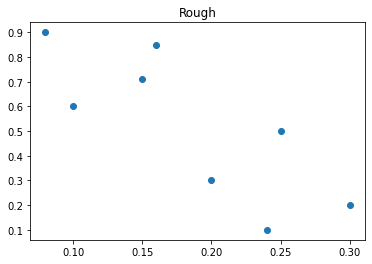

In [10]:
import matplotlib.pylab as plt
plt.title('Rough')
plt.scatter(x['m1'],x['m2'])

In [11]:
from sklearn.cluster import KMeans,AgglomerativeClustering
sse=[]
for k in range(1,5):
    km=KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)
sse

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6642, 0.15275, 0.06325, 0.036816666666666664]

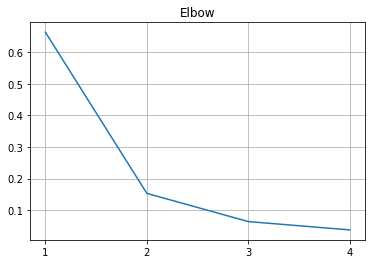

In [13]:
plt.title('Elbow')
plt.grid()
plt.xticks(range(1,5))
plt.plot(range(1,5),sse)

In [14]:
from sklearn.metrics import silhouette_score

silh=[]

for k in range(2,5):
    km=KMeans(n_clusters=k)
    labels=km.fit_predict(x)
    score=silhouette_score(x,labels)
    silh.append(score)
silh

[0.548218748725816, 0.48832409955327494, 0.38908390954170446]

<BarContainer object of 3 artists>

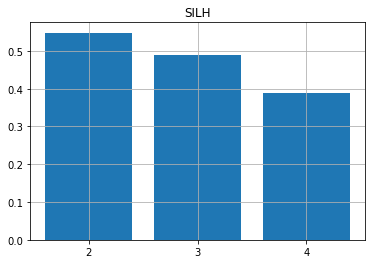

In [16]:
plt.title('SILH')
plt.grid()
plt.xticks(range(2,5))
plt.bar(range(2,5),silh)

In [17]:
km=KMeans(n_clusters=2)
labels=km.fit_predict(x)

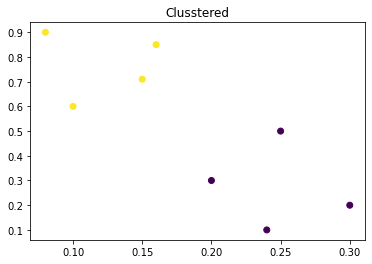

In [18]:
plt.title('Clusstered')
plt.scatter(x['m1'],x['m2'],c=labels)

In [20]:
km.predict([[0.25,0.5]])

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

In [23]:
df[labels==1]

,m1,m2
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85


In [24]:
df[labels==0]

,m1,m2
4,0.20,0.3
5,0.25,0.5
6,0.24,0.1
7,0.30,0.2


In [25]:
df['cluster'] = labels

# Population of the cluster around m2
cluster_m2_population = df[df['cluster'] == 1].shape[0]
print(f"Population of the cluster around m2: {cluster_m2_population}")

Population of the cluster around m2: 4


In [26]:
centroid_m1 = km.cluster_centers_[0]
centroid_m2 = km.cluster_centers_[1]
print(f"Updated value of m1: {centroid_m1}")
print(f"Updated value of m2: {centroid_m2}")

Updated value of m1: [0.2475 0.275 ]
Updated value of m2: [0.1225 0.765 ]
